# Анализ и предобработка датасета

In [1]:
# Установка библиотек
# %pip install kagglehub seaborn numpy pandas matplotlib
# %pip install ipywidgets
# %pip install scikit-learn
# %pip install torch torchvision --index-url https://download.pytorch.org/whl/cu130

## Импорт библиотек


In [2]:
# Импорт библиотек

import kagglehub
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)

In [3]:
# Загрузка датасета из Kaggle

source_path = kagglehub.dataset_download("amritachatterjee09/lead-scoring-dataset")

# Копирование в папку рядом с .ipynb
destination_path = os.path.join(os.getcwd(), "lead-scoring-dataset")
if not os.path.exists(destination_path):
    shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
    print("Файлы датасета перенесены в:", destination_path)
else:
    print("Датасет уже скачан, используем локальную копию:", destination_path)

Датасет уже скачан, используем локальную копию: e:\LS_EDU\lead-scoring-dataset


In [4]:
print(os.getcwd())

e:\LS_EDU


In [5]:
df = pd.read_csv("lead-scoring-dataset/Lead Scoring.csv", low_memory=False)

In [6]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,...,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,...,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,...,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,...,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,...,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,...,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,...,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,...,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,...,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [7]:
# Размер датасета

df.shape

(9240, 37)

In [8]:
# Типы данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Удаление идентификаторов

id_col = ['Prospect ID', 'Lead Number']
df = df.drop(columns=id_col)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [11]:
# Список столбцов с огромным количеством пропусков
nan_col = [
    'Lead Quality',
    'Asymmetrique Activity Index',
    'Asymmetrique Profile Index',
    'Asymmetrique Activity Score',
    'Asymmetrique Profile Score'
]

print('Доля пропусков (%) по этим столбцам:')
print((df[nan_col].isna().mean() * 100).round(2))

for col in nan_col:
    print(f"\n{col} — значения:")
    print(df[col].value_counts(dropna=False).head())

Доля пропусков (%) по этим столбцам:
Lead Quality                   51.59
Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Score     45.65
dtype: float64

Lead Quality — значения:
Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Name: count, dtype: int64

Asymmetrique Activity Index — значения:
Asymmetrique Activity Index
NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

Asymmetrique Profile Index — значения:
Asymmetrique Profile Index
NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

Asymmetrique Activity Score — значения:
Asymmetrique Activity Score
NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
Name: count, dtype: int64

Asymmetrique Profile Score — значения:
Asymmetrique Profile Score
NaN     4

In [12]:
# Удаление столбцов с большим количеством пропусков

df = df.drop(columns=nan_col)
df.shape


(9240, 30)

In [13]:

# Список колонок, где встречаются заглушки

select_col = [
    'Specialization',
    'How did you hear about X Education',
    'What is your current occupation',
    'What matters most to you in choosing a course',
    'Lead Profile',
    'City',
    'Country',
    'Tags'
]

# слова  заглушки

placeholders = [
    'Select', 'Select City', 'Select Specialization',
    'Not specified', 'Unknown', 'Other'
]

# замена заглушек в анкетах

for col in select_col:
    if col in df.columns:
        df[col] = df[col].replace(placeholders, np.nan)

df[select_col].head()

,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Country,Tags
0,NaN,NaN,Unemployed,Better Career Prospects,NaN,NaN,NaN,Interested in other courses
1,NaN,NaN,Unemployed,Better Career Prospects,NaN,NaN,India,Ringing
2,Business Administration,NaN,Student,Better Career Prospects,Potential Lead,Mumbai,India,Will revert after reading the email
3,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,NaN,Mumbai,India,Ringing
4,NaN,NaN,Unemployed,Better Career Prospects,NaN,Mumbai,India,Will revert after reading the email


In [14]:
# маппинг столбцов

map_col = [
    'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
    'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content', 'Get updates on DM Content',
    'I agree to pay the amount through cheque',
    'A free copy of Mastering The Interview'
]

for col in map_col:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

df[map_col].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# нормализация регистр на примере Google/google
col_to_normalize = ['Lead Source', 'Lead Origin', 'Country', 'City']
for col in col_to_normalize:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()


In [16]:
# распределение данных

categorical_col = [
    'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
    'How did you hear about X Education', 'What is your current occupation',
    'What matters most to you in choosing a course', 'Lead Profile',
    'City', 'Tags', 'Last Notable Activity'
]

for col in categorical_col:
    print("\n---", col, "---")
    print(df[col].value_counts(dropna=False).head(20))


--- Lead Origin ---
Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64

--- Lead Source ---
Lead Source
google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
                    ... 
blog                   1
welearn                1
welearnblog_home       1
youtubechannel         1
testone                1
Name: count, Length: 20, dtype: int64

--- Last Activity ---
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
                                ... 
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow  

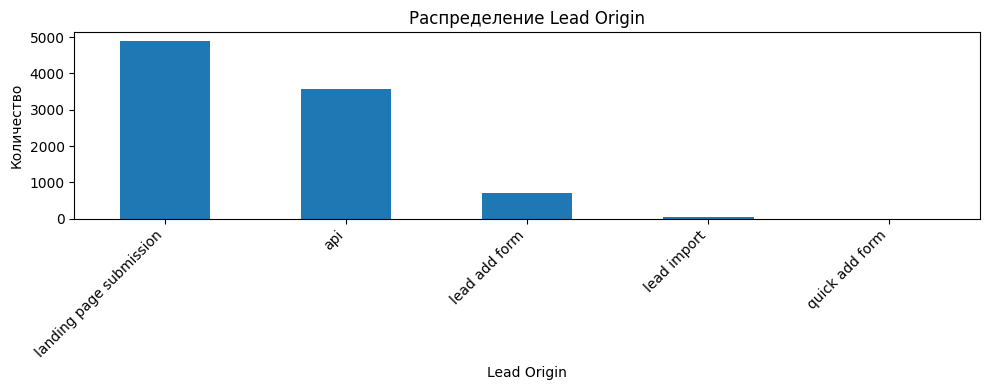

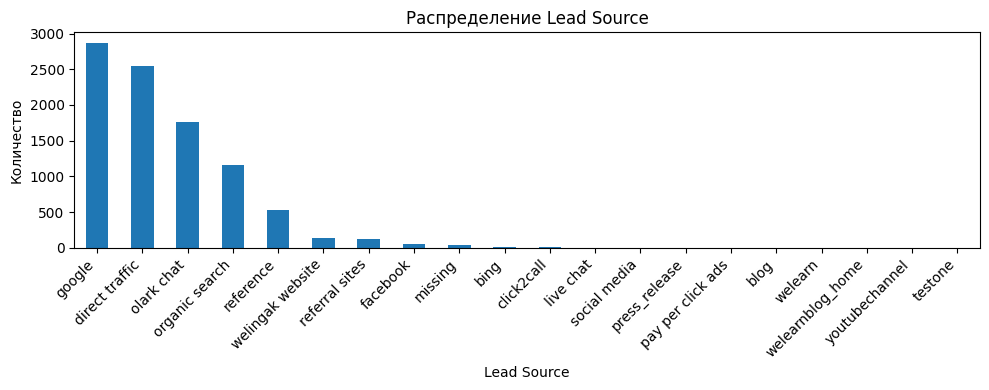

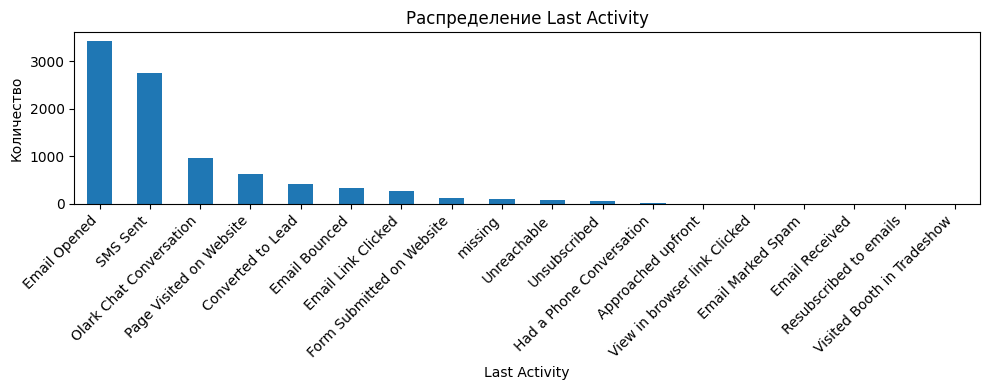

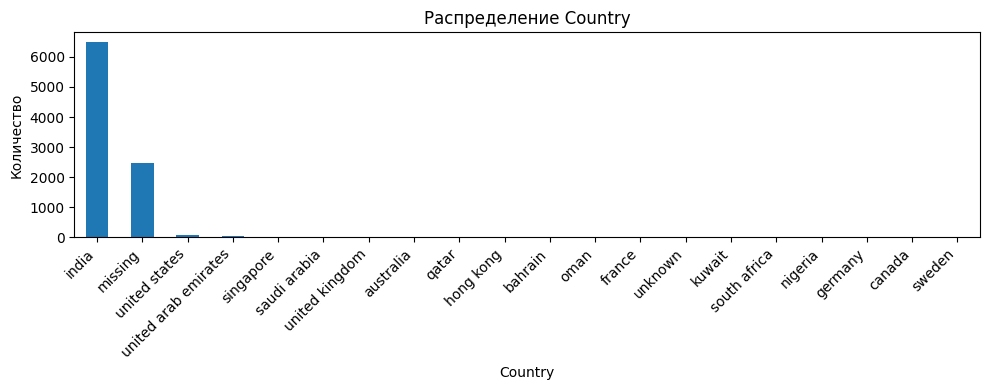

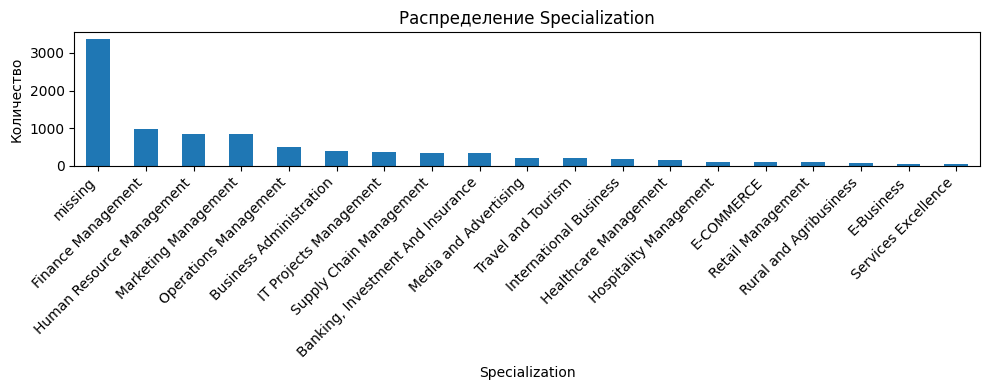

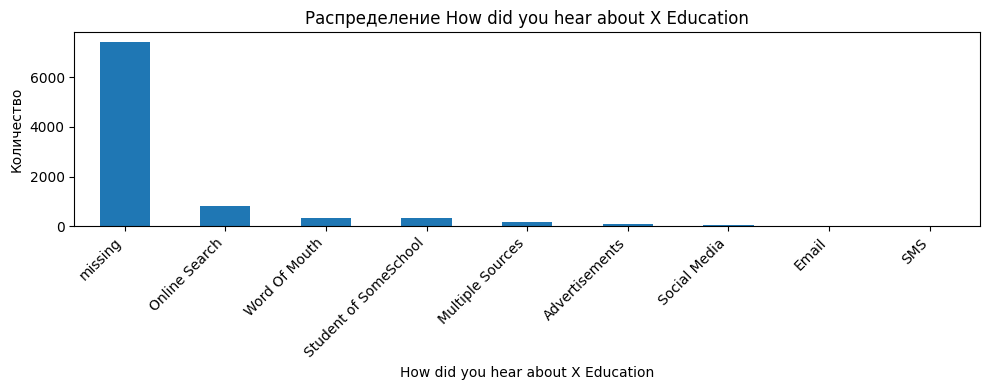

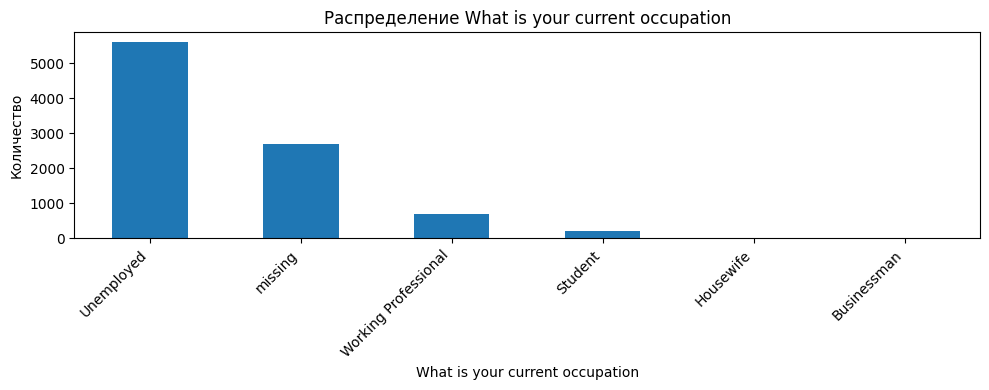

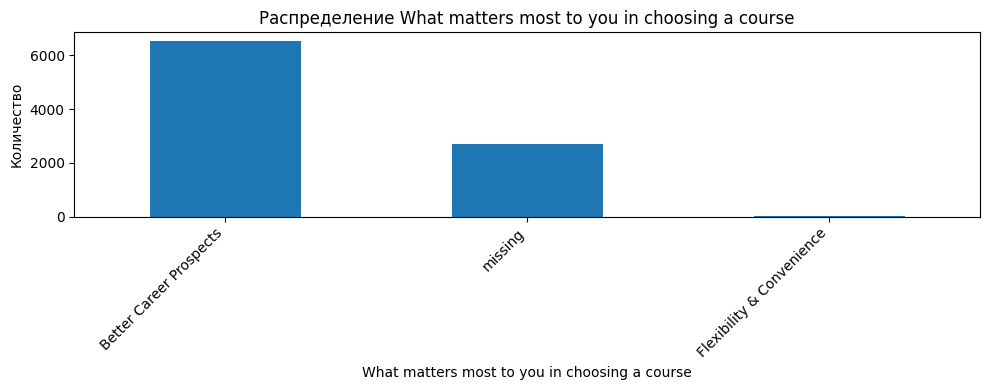

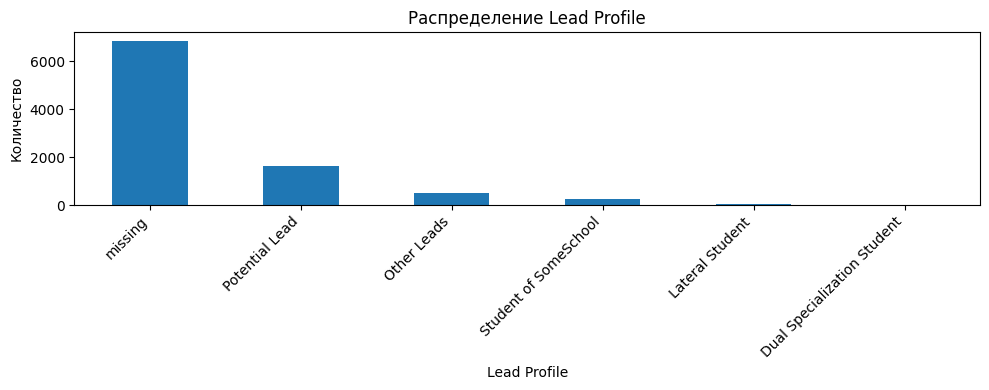

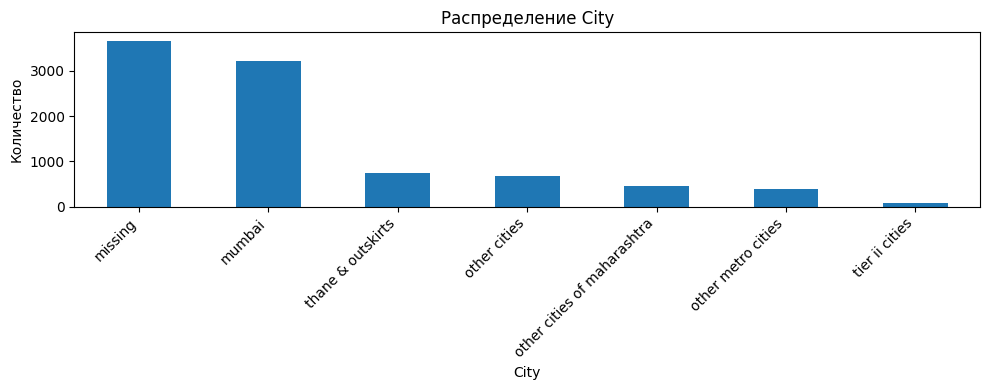

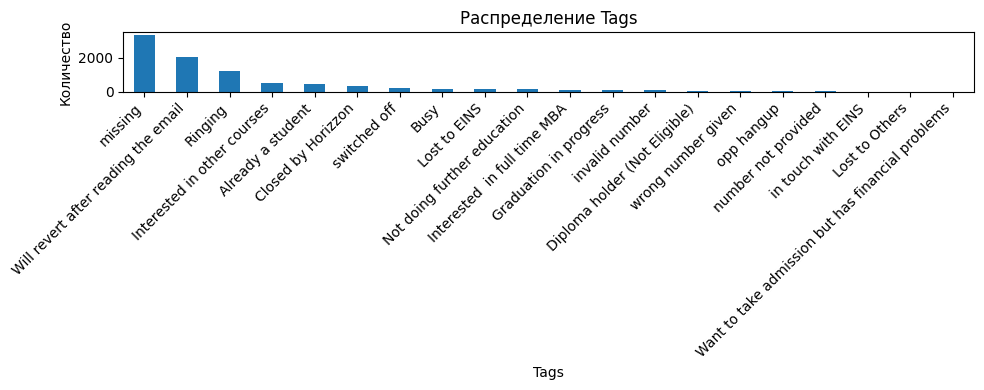

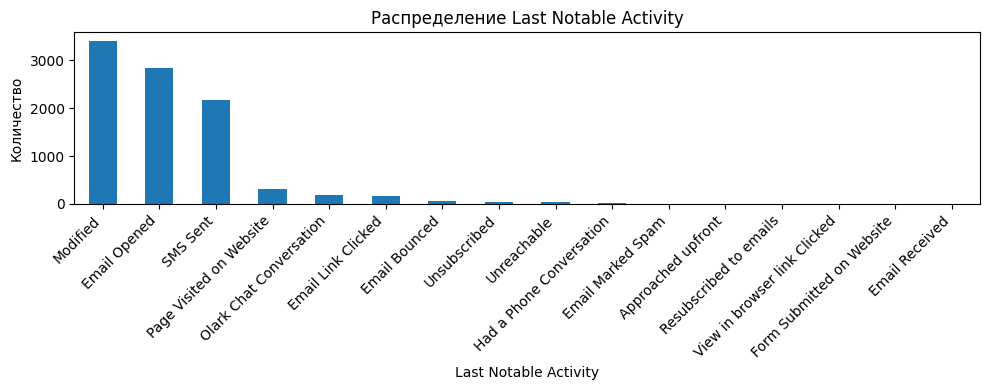

In [ ]:
# Визуализация распределения категориальных признаков

categorical_col = [
    'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
    'How did you hear about X Education', 'What is your current occupation',
    'What matters most to you in choosing a course', 'Lead Profile',
    'City', 'Tags', 'Last Notable Activity'
]

for col in categorical_col:
    counts = (
        df[col]
        .fillna('missing')
        .value_counts(dropna=False)
        .head(20)
    )

    plt.figure(figsize=(10, 4))
    counts.plot(kind='bar')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [18]:
# Заполняем все указанные категориальные столбцы значением Unknown
unknown_col = [
    'City',
    'How did you hear about X Education',
    'What is your current occupation',
    'What matters most to you in choosing a course',
    'Lead Profile',
    'Country',
    'Lead Source',
    'Specialization',
    'Tags'
]

for col in unknown_col:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [19]:
# проверка

df[['Lead Source','Country','City','Specialization','Tags']].head(10)

,Lead Source,Country,City,Specialization,Tags
0,olark chat,Unknown,Unknown,Unknown,Interested in other courses
1,organic search,india,Unknown,Unknown,Ringing
2,direct traffic,india,mumbai,Business Administration,Will revert after reading the email
3,direct traffic,india,mumbai,Media and Advertising,Ringing
4,google,india,mumbai,Unknown,Will revert after reading the email
5,olark chat,Unknown,Unknown,Unknown,Unknown
6,google,india,mumbai,Supply Chain Management,Will revert after reading the email
7,olark chat,Unknown,Unknown,Unknown,Unknown
8,direct traffic,india,thane & outskirts,IT Projects Management,Unknown
9,google,india,mumbai,Finance Management,Unknown


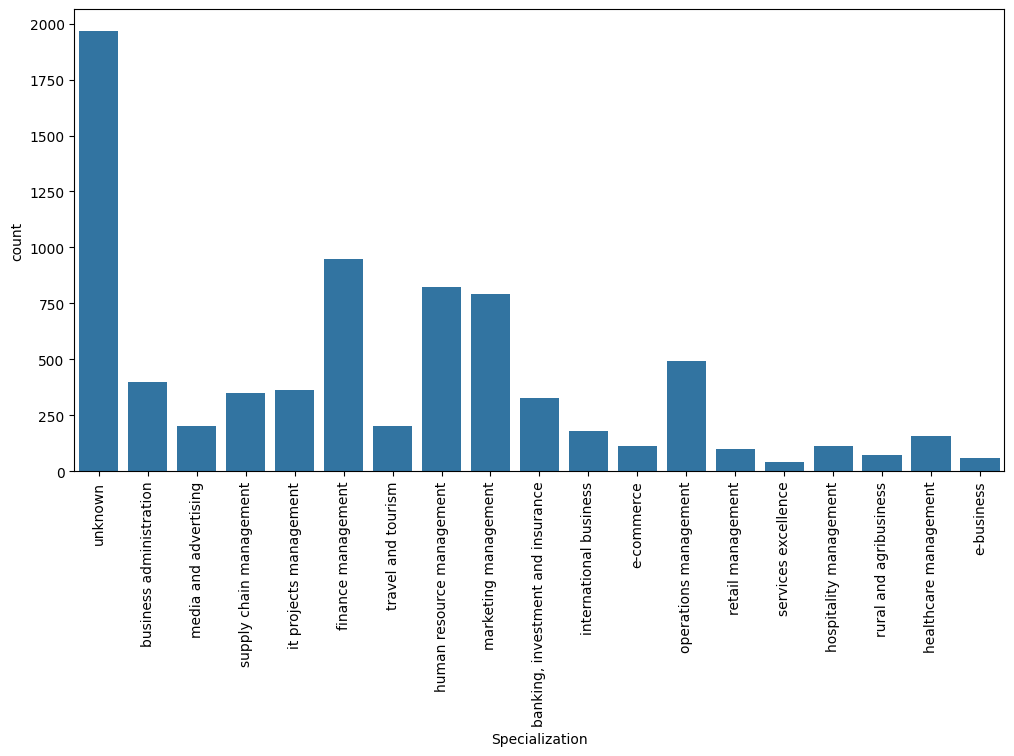

In [ ]:
# Пример визуализации распределения после обработки пропусков
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='Specialization',
    hue=None,
)
plt.xticks(rotation=90)
plt.show()


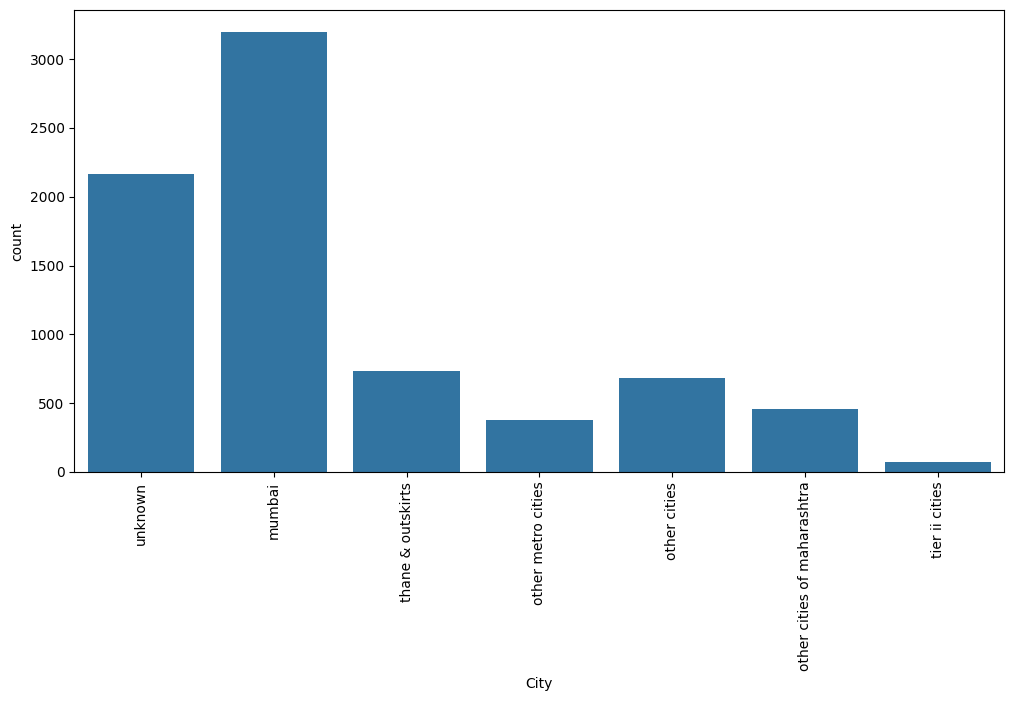

In [51]:
# Пример визуализации распределения после обработки пропусков
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='City',
    hue=None,
)
plt.xticks(rotation=90)
plt.show()


In [21]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
                                           ..
Lead Profile                                0
City                                        0
I agree to pay the amount through cheque    0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
Length: 30, dtype: int64

In [22]:
# Определяем числовые признаки (исключаем целевую переменную)
num_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_col = [c for c in num_col if c not in ['Converted']]

# Заполняем пропуски в числовых признаках медианами, чтобы избежать смещения распределения и убрать NaN
for col in num_col:
    df[col] = df[col].fillna(df[col].median())

# Определяем категориальные признаки
cat_col = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_col:
    df[col] = df[col].fillna('Unknown')
    
# Проверяем количество колонок каждого типа
len(num_col), len(cat_col)

(17, 12)

In [23]:
# Проверяем, остались ли пропуски в данных после заполнения

df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
                                           ..
Lead Profile                                0
City                                        0
I agree to pay the amount through cheque    0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
Length: 30, dtype: int64

In [24]:
# Подсчитываем количество полностью повторяющихся строк в датасете

df.duplicated().sum()

np.int64(1549)

In [25]:
# Удаляем повторяющиеся строки

df = df.drop_duplicates().reset_index(drop=True)

# Проверяем общее количество строк и столбцов после очистки
df_shape = df.shape

# Считаем, сколько объектов относится к каждому классу целевой переменной.
class_counts = df['Converted'].value_counts()

# Смотрим долю каждого класса, чтобы оценить возможный дисбаланс.
class_ratio = df['Converted'].value_counts(normalize=True)

df_shape, class_counts, class_ratio

((7691, 30),
 Converted
 0    4635
 1    3056
 Name: count, dtype: int64,
 Converted
 0    0.602652
 1    0.397348
 Name: proportion, dtype: float64)

In [26]:
# добавление нового признака недавнего контакта по активности
contact_events = {
    'Had a Phone Conversation',
    'Visited Booth in Tradeshow',
    'Approached upfront',
    'Email Opened',
    'Email Received',
    'Email Link Clicked',
    'SMS Sent',
    'Form Submitted on Website',
    'Olark Chat Conversation',
    'View in browser link Clicked',
    'Page Visited on Website'
}

def _recent_contact(row):
    return int((row.get('Last Activity') in contact_events) or (row.get('Last Notable Activity') in contact_events))

df['Recent_Contact'] = df.apply(_recent_contact, axis=1)
df['Recent_Contact'].value_counts(normalize=True)

Recent_Contact
1    0.872188
0    0.127812
Name: proportion, dtype: float64

In [27]:
# Проверяем типы данных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Do Not Email,7691.0,0.087635,0.282782,0.0,0.0,0.0,0.0,1.0
Do Not Call,7691.0,0.000260,0.016125,0.0,0.0,0.0,0.0,1.0
Converted,7691.0,0.397348,0.489381,0.0,0.0,0.0,1.0,1.0
TotalVisits,7691.0,4.130282,5.004464,0.0,2.0,3.0,5.0,251.0
Total Time Spent on Website,7691.0,585.658042,550.709840,0.0,124.5,349.0,1060.0,2272.0
...,...,...,...,...,...,...,...,...
Update me on Supply Chain Content,7691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Get updates on DM Content,7691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
I agree to pay the amount through cheque,7691.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
A free copy of Mastering The Interview,7691.0,0.375374,0.484251,0.0,0.0,0.0,1.0,1.0


In [28]:
# Удаление столбцов которые имеют только одно значение
exclude = {'Converted'}

value_dominance = df.apply(
    lambda s: s.value_counts(normalize=True, dropna=False).max()
)

low_var_cols = value_dominance[
    (value_dominance >= 0.99) & ~value_dominance.index.isin(exclude)
].index

print('Удаляем:', list(low_var_cols))
df = df.drop(columns=low_var_cols)


Удаляем: ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [29]:
# Категориальные столбцы для one-hot encoding
cat_col = df.select_dtypes(include=['object']).columns.tolist()
print(f'Категориальные столбцы: {len(cat_col)}')
for col in cat_col[:5]:
    print(col, 'уникальных:', df[col].nunique())


Категориальные столбцы: 12
Lead Origin уникальных: 5
Lead Source уникальных: 21
Last Activity уникальных: 18
Country уникальных: 39
Specialization уникальных: 19


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Do Not Email,7691.0,0.087635,0.282782,0.0,0.0,0.00,0.0,1.0
Converted,7691.0,0.397348,0.489381,0.0,0.0,0.00,1.0,1.0
TotalVisits,7691.0,4.130282,5.004464,0.0,2.0,3.00,5.0,251.0
Total Time Spent on Website,7691.0,585.658042,550.709840,0.0,124.5,349.00,1060.0,2272.0
Page Views Per Visit,7691.0,2.831459,2.046895,0.0,2.0,2.33,4.0,55.0
A free copy of Mastering The Interview,7691.0,0.375374,0.484251,0.0,0.0,0.00,1.0,1.0
Recent_Contact,7691.0,0.872188,0.333902,0.0,1.0,1.00,1.0,1.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    7691 non-null   object 
 1   Lead Source                                    7691 non-null   object 
 2   Do Not Email                                   7691 non-null   int64  
 3   Converted                                      7691 non-null   int64  
 4   TotalVisits                                    7691 non-null   float64
 5   Total Time Spent on Website                    7691 non-null   int64  
 6   Page Views Per Visit                           7691 non-null   float64
 7   Last Activity                                  7691 non-null   object 
 8   Country                                        7691 non-null   object 
 9   Specialization                                 7691 